In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace = True)

In [4]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 11)

In [6]:
data = pd.get_dummies(data = data ,columns=['Geography','Gender',],drop_first=True)

In [7]:
x = data.drop(['Exited'],axis =1)
y = data[['Exited']]

In [8]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [9]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
x= obj.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = .2,random_state=1)

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [12]:
model = Sequential()
model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

C:\Users\vivek\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [15]:
history = model.fit(xtrain,ytrain,epochs = 100,validation_split = .2 )

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7921 - loss: 0.5440 - val_accuracy: 0.7975 - val_loss: 0.4765
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.7967 - loss: 0.4681 - val_accuracy: 0.8056 - val_loss: 0.4482
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.7979 - loss: 0.4471 - val_accuracy: 0.8062 - val_loss: 0.4341
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.8164 - loss: 0.4294 - val_accuracy: 0.8150 - val_loss: 0.4220
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.8157 - loss: 0.4250 - val_accuracy: 0.8188 - val_loss: 0.4103
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.8269 - loss: 0.4091 - val_accuracy: 0.8225 - val_loss: 0.4001
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8300 - loss: 0.4035 - val_accuracy: 0.8269 - val_loss: 0.3896
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.8450 - loss: 0.3

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8611 - loss: 0.3279 - val_accuracy: 0.8456 - val_loss: 0.3520
Epoch 51/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8684 - loss: 0.3225 - val_accuracy: 0.8475 - val_loss: 0.3511
Epoch 52/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8695 - loss: 0.3207 - val_accuracy: 0.8462 - val_loss: 0.3511
Epoch 53/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8659 - loss: 0.3271 - val_accuracy: 0.8500 - val_loss: 0.3512
Epoch 54/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8707 - loss: 0.3236 - val_accuracy: 0.8475 - val_loss: 0.3506
Epoch 55/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.8641 - loss: 0.3292 - val_accuracy: 0.8469 - val_loss: 0.3502
Epoch 56/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8653 - loss: 0.3275 - val_accuracy: 0.8494 - val_loss: 0.3506
Epoch 57/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8680 - loss: 0.3240 - v

Epoch 100/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8674 - loss: 0.3202 - val_accuracy: 0.8487 - val_loss: 0.3468


In [16]:
model.layers[1].get_weights()

[array([[-0.5463425 , -0.23418725,  0.25375402,  0.28464442, -0.18833993,
         -0.31200504,  0.43422818,  0.09914757, -0.1837443 ,  0.10357381,
          0.28509554],
        [-0.16822936,  0.28517315,  0.06550243, -0.16994745,  0.5707641 ,
          0.6651102 ,  0.4502131 , -0.18700391,  0.55732036,  0.21300282,
         -0.4050886 ],
        [-0.50558525,  0.7241915 ,  0.7488092 ,  0.39444888, -0.04247955,
         -0.14784886, -0.30486324,  0.09206678, -0.7724077 ,  0.7802138 ,
         -0.10156638],
        [ 0.7336659 ,  0.70100415,  0.00458864, -2.0441356 , -0.24530719,
          0.99643093,  0.27001613,  0.43738112,  0.11207777,  0.32660556,
          0.5400108 ],
        [-0.2204043 ,  0.28299052, -0.12181264, -1.0368822 ,  0.05238531,
          0.58895075, -0.47764522,  0.80082506, -0.32998937,  0.07185464,
         -0.5159576 ],
        [ 0.67153734, -0.80540127,  0.27776894,  0.14320542, -0.96871823,
          0.09381793, -0.03161035, -0.01789726,  0.02057047, -0.2584520

In [17]:
model.predict(xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.02627086],
       [0.09014812],
       [0.0284131 ],
       ...,
       [0.00722308],
       [0.05068762],
       [0.21249266]], dtype=float32)

In [18]:
import numpy as np
predict_y = np.where(model.predict(xtest)>.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict_y)

0.86

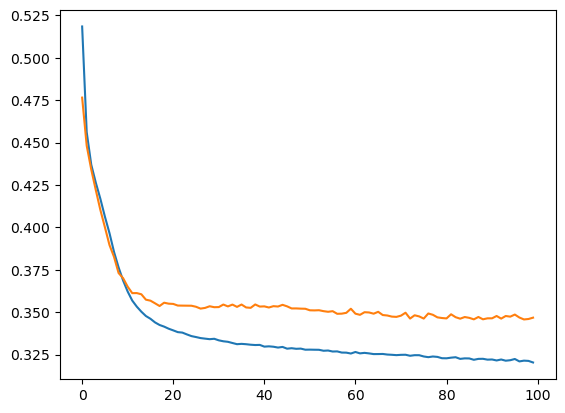

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

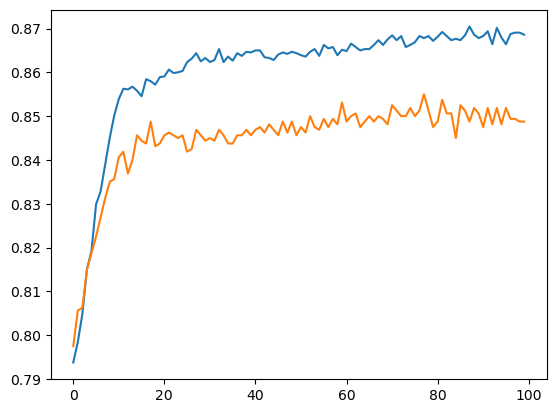

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [22]:
predict_y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [23]:
ytest[:10]

,Exited
9953,0
3850,0
4962,0
3886,0
5437,0
8517,0
2041,0
1989,0
1933,0
9984,0


In [24]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(ytest,predict_y))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.76      0.48      0.59       415

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

